In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from keras import layers
from sklearn.model_selection import RandomizedSearchCV,train_test_split,GridSearchCV
import tensorflow as tf
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import  accuracy_score,precision_score,recall_score,f1_score,classification_report
import warnings
warnings.filterwarnings("ignore")

      letter  xbox  ybox  width  height  ...  xy2bar  xedge  xedgey  yedge  yedgex
0          T     2     8      3       5  ...       8      0       8      0       8
1          I     5    12      3       7  ...       9      2       8      4      10
2          D     4    11      6       8  ...       7      3       7      3       9
3          N     7    11      6       6  ...      10      6      10      2       8
4          G     2     1      3       1  ...       9      1       7      5      10
...      ...   ...   ...    ...     ...  ...     ...    ...     ...    ...     ...
19995      D     2     2      3       3  ...       4      2       8      3       7
19996      C     7    10      8       8  ...      13      2       9      3       7
19997      T     6     9      6       7  ...       5      2      12      2       4
19998      S     2     3      4       2  ...       8      1       9      5       8
19999      A     4     9      6       6  ...       8      2       7      2       8

[20

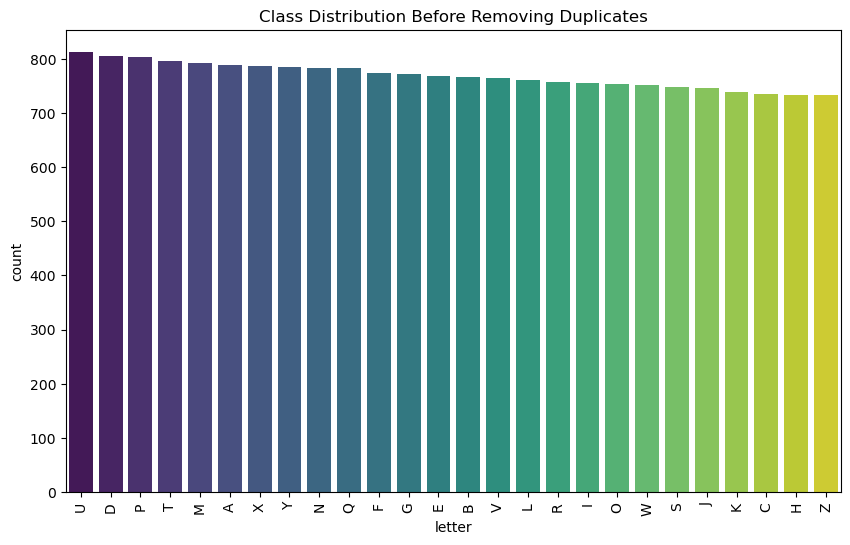

Class Distribution (%) Before Removing Duplicates:
letter
U    4.065
D    4.025
P    4.015
T    3.980
M    3.960
A    3.945
X    3.935
Y    3.930
N    3.915
Q    3.915
F    3.875
G    3.865
E    3.840
B    3.830
V    3.820
L    3.805
R    3.790
I    3.775
O    3.765
W    3.760
S    3.740
J    3.735
K    3.695
C    3.680
H    3.670
Z    3.670
Name: count, dtype: float64
Shape of Features (X): (18668, 16)
Shape of Target (y): (18668,)
Epoch 1/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2506 - loss: 2.6742 - val_accuracy: 0.6652 - val_loss: 1.1785
Epoch 2/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7101 - loss: 1.0113 - val_accuracy: 0.7466 - val_loss: 0.8452
Epoch 3/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7919 - loss: 0.7099 - val_accuracy: 0.7891 - val_loss: 0.6932
Epoch 4/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8245 - loss: 0.5830 - val_accuracy: 0.8252 - val_loss: 0.5902
Epoch 5/30
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

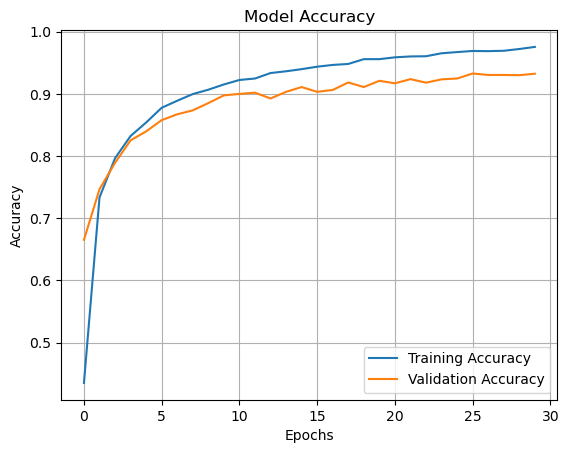

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9303 - loss: 0.1940
Test Accuracy: 93.36%
Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Hyperparameters: {'model__neurons': 128, 'model__learning_rate': 0.01, 'model__layers_count': 2, 'model__activation': 'relu'}
Best Validation Accuracy: 0.9436185884558724
Fitting 3 folds for each of 64 candidates, totalling 192 fits
Best Hyperparameters (Grid Search): {'batch_size': 256, 'epochs': 20, 'model__activation': 'tanh', 'model__layers_count': 2, 'model__learning_rate': 0.01, 'model__neurons': 64}
Best Validation Accuracy (Grid Search): 0.9319003615910004
Accuracy: 95.07%
Precision: 0.95
Recall: 0.95
F1-score: 0.95

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       144
           1       0.95      0.89      0.92       156
           2       0.96      0.91      0.94       147
           3       0.91      0.97      0.94       163
           4

In [11]:
def Neural_Network():
    try:
        # Load dataset
        df_Alphabets_data = pd.read_csv("Alphabets_data.csv")
        print(df_Alphabets_data)

        print("Step 2: Check the Data types and column details") 
        # Analyzing the Dataset
        df_Alphabets_data.info()

        #print("Data cleaning")
        duplicates = df_Alphabets_data.duplicated()
        print("Count of duplicate rows")
        print(duplicates.sum())
        
        # Class distribution before removing duplicates
        class_counts_before = df_Alphabets_data['letter'].value_counts()
        
        # Visualizing class distribution
        plt.figure(figsize=(10, 6))
        sns.countplot(x='letter', data=df_Alphabets_data, order=class_counts_before.index, palette='viridis')
        plt.title('Class Distribution Before Removing Duplicates')
        plt.xticks(rotation=90)
        plt.savefig("Class Distribution.png", dpi=300)
        plt.show()

        # Percentage distribution
        print("Class Distribution (%) Before Removing Duplicates:")
        print(class_counts_before / len(df_Alphabets_data) * 100)

        df_Alphabets_data_cleaned = df_Alphabets_data.drop_duplicates()

        # Encode the target variable
        encoder = LabelEncoder()
        y = encoder.fit_transform(df_Alphabets_data_cleaned['letter'])

        # Normalize feature data
        scaler = StandardScaler()
        X = scaler.fit_transform(df_Alphabets_data_cleaned.drop('letter', axis=1))

        print(f"Shape of Features (X): {X.shape}")
        print(f"Shape of Target (y): {y.shape}")

        #Building the ANN Model
        # Split data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        # ANN Model Architecture
        model = keras.models.Sequential([
            layers.Input(shape=(X_train.shape[1],)),  # Input layer (16 features)
            layers.Dense(128, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(26, activation='softmax')]) # Output layer (26 classes)
        

        # Compile the Model
        model.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])

        # Train the Model
        history = model.fit(X_train, y_train, 
                    epochs=30, 
                    batch_size=64, 
                    validation_split=0.2, 
                    callbacks=[keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)])

        # Plot Accuracy
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.savefig("Model Accuracy.png", dpi=300)
        plt.show()

        # Evaluate the Model
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

        # Correct model creation function
        def create_model(learning_rate=0.001, activation='relu', neurons=64, layers_count=2):
            model = keras.models.Sequential()
            model.add(layers.Input(shape=(X_train.shape[1],)))

            for _ in range(layers_count):  # Fixed loop variable
                model.add(layers.Dense(neurons, activation=activation))

            model.add(layers.Dense(len(np.unique(y_train)), activation='softmax'))

            model.compile(optimizer=Adam(learning_rate=learning_rate),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
            return model
        
        early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

        # Correct parameter distribution
        param_dist = {
           'model__learning_rate': [0.001, 0.01],
           'model__activation': ['relu', 'tanh'],
           'model__neurons': [64, 128],  
           'model__layers_count': [1, 2]}

        # Wrap the model
        model = KerasClassifier(model=create_model, epochs=30, batch_size=64, verbose=0)

        # Random Search
        random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=5, cv=3, verbose=2, n_jobs=-1)
        random_search.fit(X_train, y_train, callbacks=[early_stopping])

        # Best Parameters and Model Evaluation
        print("Best Hyperparameters:", random_search.best_params_)
        print("Best Validation Accuracy:", random_search.best_score_)

        #Grid Search for Fine-tuning
        #identified optimal ranges using Random Search, refine those parameters using Grid Search.
        # Define refined parameter grid
        param_grid = {
          'model__learning_rate': [0.001, 0.01],
          'model__activation': ['relu', 'tanh'],
          'model__neurons': [32, 64],
          'model__layers_count': [1, 2],
          'batch_size': [128, 256],
          'epochs': [10, 20]}

        # Grid Search
        grid_search = GridSearchCV(model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
        grid_search.fit(X_train, y_train, callbacks=[early_stopping])

        print("Best Hyperparameters (Grid Search):", grid_search.best_params_)
        print("Best Validation Accuracy (Grid Search):", grid_search.best_score_)

        # Use the best model from Random Search
        best_model = random_search.best_estimator_
        y_pred = best_model.predict(X_test)  # For multi-class classification

        # Evaluation Metrics
        print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
        print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
        print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
        print(f"F1-score: {f1_score(y_test, y_pred, average='weighted'):.2f}")

        # Detailed Report for Class-wise Performance
        print("\nClassification Report:\n", classification_report(y_test, y_pred))
    except FileNotFoundError:
        print("Error")

Neural_Network()